In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("accidents.csv", sep=",", decimal=",", engine='python')

In [3]:
df.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)

In [5]:
df.dtypes

accident_index                         object
vehicle_reference                       int64
vehicle_type                            int64
towing_and_articulation                 int64
vehicle_manoeuvre                       int64
                                       ...   
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
Length: 70, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-null  int64  
 9   vehi

In [7]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 285331
Number of columns: 70


In [8]:
pd.isnull(df).sum()

accident_index                            0
vehicle_reference                         0
vehicle_type                              0
towing_and_articulation                   0
vehicle_manoeuvre                         0
                                      ...  
bus_or_coach_passenger                99259
pedestrian_road_maintenance_worker    99259
casualty_type                         99259
casualty_home_area_type               99259
casualty_imd_decile                   99259
Length: 70, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 174538
Number of columns: 70


In [11]:
df.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,...,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000,174538.000000
mean,1.495812,8.559592,0.011929,13.454738,0.133908,2.686641,0.271729,0.460066,0.511528,0.810431,...,6.226466,2.864717,0.664262,0.479638,0.255417,0.077960,0.064370,7.251596,1.031661,4.141316
std,0.661851,7.639697,0.212766,5.986592,1.004217,3.311632,0.877256,1.952445,1.599220,2.491251,...,2.389644,0.367308,1.941278,1.666899,0.576419,0.529485,0.356158,7.481034,0.949612,3.379274
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,32.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


# THE CONTRIBUTING FACTORS IN THE ACCIDENTS:

In [12]:
value_mapping_vechicle = {1: 'Pedal cycle', 2: 'Motorcycle 50cc and under', 3: 'Motorcycle 125cc and under', 4: 'Motorcycle over 125cc and up to 500cc', 5: 'Motorcycle over 500cc',
                  8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8 - 16 passenger seats)', 11: 'Bus or coach (17 or more pass seats)', 16: 'Ridden horse',17: 'Agricultural vehicle',
                  18:'Tram',19:'Van / Goods 3.5 tonnes mgw or under',20:'Goods over 3.5t. and under 7.5t',21:'Goods 7.5 tonnes mgw and over',22:'Mobility scooter',23:'Electric motorcycle',90:'Other vehicle',
                  97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight', -1: 'Data missing or out of range'}

df['vehicle_type'] = df['vehicle_type'].replace(value_mapping_vechicle)

Text(0.5, 1.0, 'Distributions of accidents by vehicle variations')

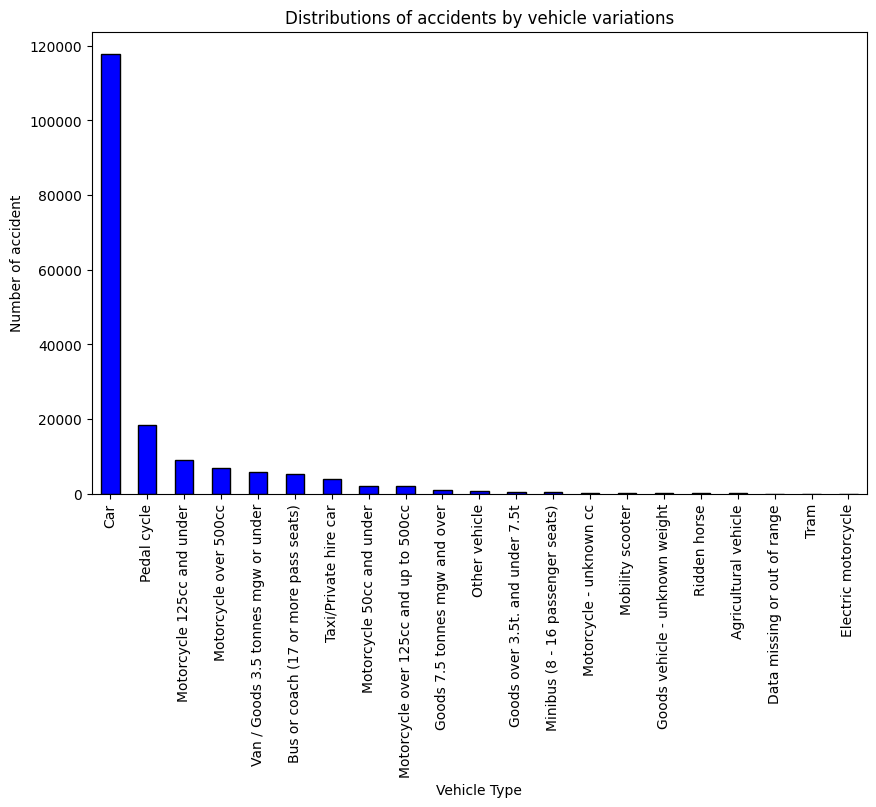

In [13]:
plt.figure(figsize=(10, 6))
df['vehicle_type'].value_counts().plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Vehicle Type')
plt.ylabel('Number of accident')
plt.title('Distributions of accidents by vehicle variations')

It can be seen from the statistics that the cars and pedal cycle are major vehicles included in the accidents ratio.

In [14]:
value_mapping_whether = {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds',
                  6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown',-1: 'out of range'}

df['weather_conditions'] = df['weather_conditions'].replace(value_mapping_whether)

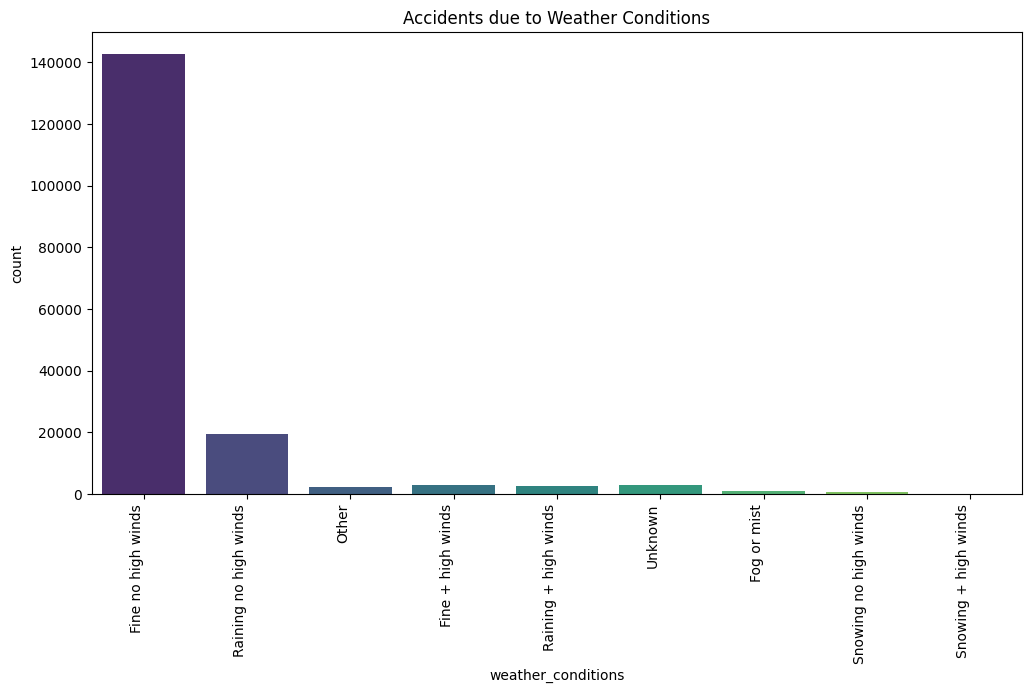

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather_conditions', hue='weather_conditions', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Accidents due to Weather Conditions')
plt.xticks(rotation=90, ha='right')
plt.show()

The accidents that occured are genrally during the time when the weather was decent without disturbance.

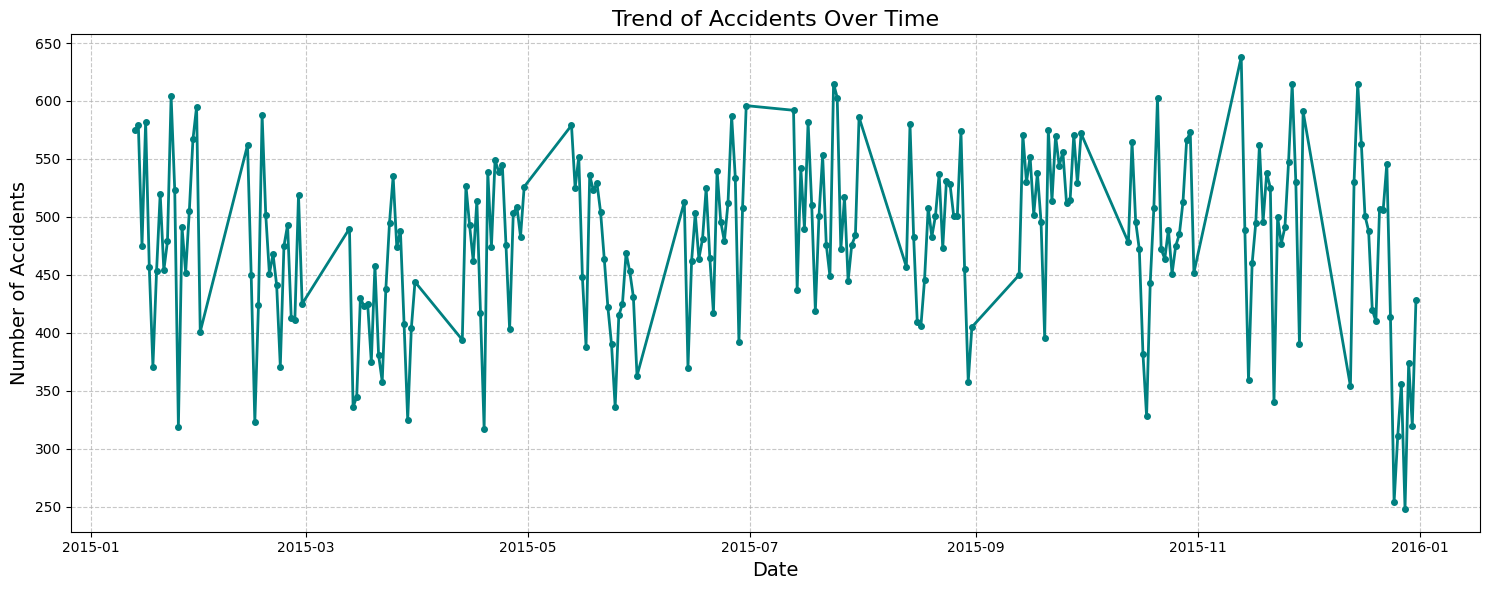

In [25]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

accidents_over_time = df['date'].value_counts().sort_index()

# Plot the trend of accidents over time
plt.figure(figsize=(15, 6))
plt.plot(accidents_over_time.index, accidents_over_time.values, marker='o', color='teal', linestyle='-', linewidth=2, markersize=4)
plt.title('Trend of Accidents Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
value_mapping_age = {-1:'out of range', 1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4:'16 - 20', 5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}

df['age_band_of_casualty'] = df['age_band_of_casualty'].replace(value_mapping_age)

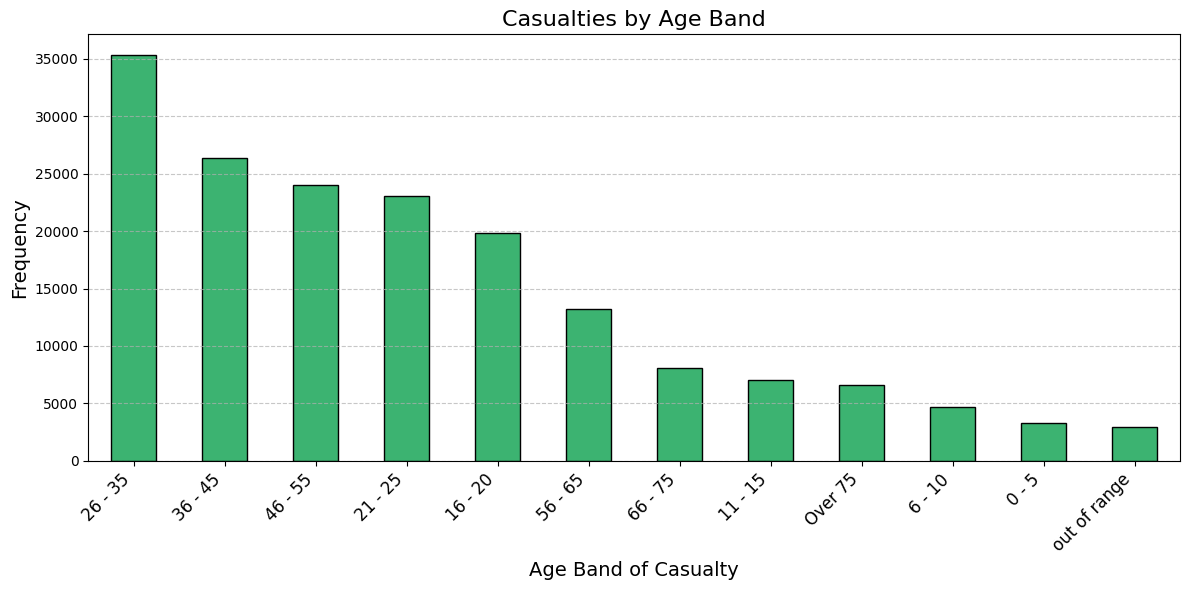

In [27]:
value_counts = df['age_band_of_casualty'].value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', rot=45, color='mediumseagreen', edgecolor='black')

# Set plot labels and title with increased font sizes
plt.xlabel('Age Band of Casualty', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('Casualties by Age Band', fontsize=16)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The Age-Group that can be targeted for the involement in accidents are among 26-35 years and even the teeneger group between 16-20 has a significant place in the statistics.

In [19]:
value_mapping1 = {1: 'Urban', 2: 'Rural', 3: 'Unallocated'}
value_mapping2 = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

df['urban_or_rural_area'] = df['urban_or_rural_area'].replace(value_mapping1)
df['accident_severity'] = df['accident_severity'].replace(value_mapping2)

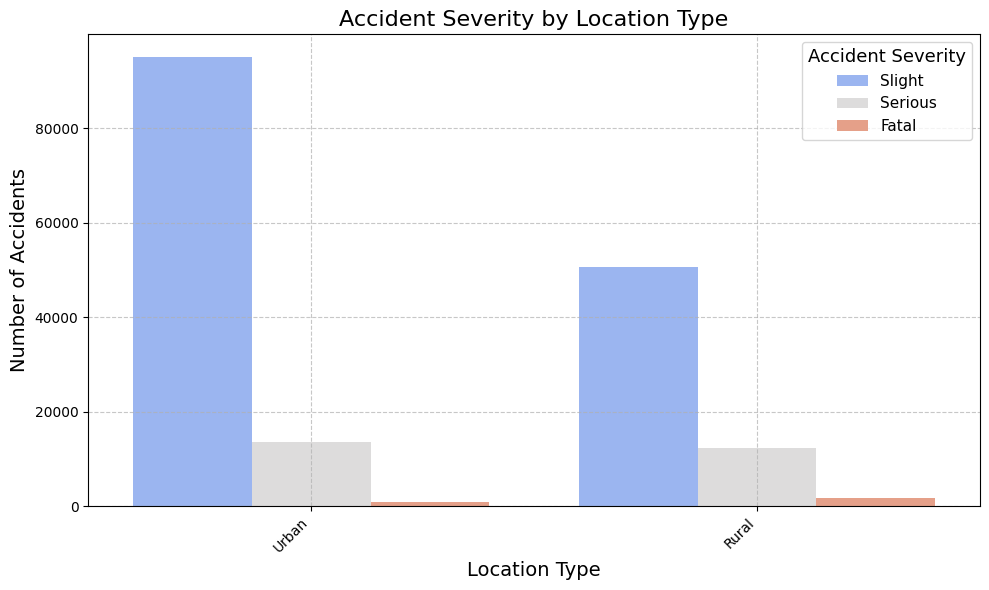

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='urban_or_rural_area', hue='accident_severity', palette='coolwarm')
plt.title('Accident Severity by Location Type', fontsize=16)
plt.xlabel('Location Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

The urban areas are facing the higher rates of acidents in compared to the rural areas based on the severity. 